In [43]:
from __future__ import annotations
from abc import ABC, abstractmethod
import pandas as pd
import numpy as np
from sklearn import metrics,linear_model
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

FILE = 'data'
colum = 'alcohol'
listErrors = {}


# Obtención de datos

In [9]:
data = pd.read_csv('%s/winequality-white-missing.csv' %FILE, sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4400 non-null   float64
 1   volatile acidity      4431 non-null   float64
 2   citric acid           4411 non-null   float64
 3   residual sugar        4434 non-null   float64
 4   chlorides             4387 non-null   float64
 5   free sulfur dioxide   4398 non-null   float64
 6   total sulfur dioxide  4429 non-null   float64
 7   density               4413 non-null   float64
 8   pH                    4415 non-null   float64
 9   sulphates             4372 non-null   float64
 10  alcohol               4412 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4400.000000,4431.000000,4411.000000,4434.000000,4387.000000,4398.000000,4429.000000,4413.000000,4415.000000,4372.000000,4412.000000,4898.000000
mean,6.849080,0.277857,0.334670,6.393223,0.046018,35.394839,137.756266,0.994038,3.188061,0.489879,10.518351,5.877909
std,0.835875,0.100151,0.122274,5.086485,0.022396,17.092922,42.078770,0.003014,0.151680,0.114343,1.234730,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.850000,0.050000,46.000000,166.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
originalData = pd.read_csv('%s/winequality-white.csv' %FILE, sep=";")
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
originalData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
positionalLostValues = data[colum].isnull()
positionalLostValues

0       False
1       False
2        True
3       False
4        True
        ...  
4893     True
4894    False
4895    False
4896    False
4897    False
Name: alcohol, Length: 4898, dtype: bool

In [14]:
def getError(tableA, tableB, positionalLostValues):
    return metrics.mean_squared_error(
        tableA.loc[positionalLostValues, colum], 
        tableB.loc[positionalLostValues, colum]
    )

## Imputación por la media

In [15]:
def calculateMean(table: pd.DataFrame, positionalLostValues: pd.Series) -> float:
    return table.loc[~positionalLostValues, colum].mean()


In [16]:
meanImputationData = data.copy()

In [17]:
mean = calculateMean(meanImputationData, positionalLostValues)
mean

10.518350710184345

In [18]:
meanImputationData.loc[positionalLostValues, colum] = mean
meanImputationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4400 non-null   float64
 1   volatile acidity      4431 non-null   float64
 2   citric acid           4411 non-null   float64
 3   residual sugar        4434 non-null   float64
 4   chlorides             4387 non-null   float64
 5   free sulfur dioxide   4398 non-null   float64
 6   total sulfur dioxide  4429 non-null   float64
 7   density               4413 non-null   float64
 8   pH                    4415 non-null   float64
 9   sulphates             4372 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [19]:
listErrors["Mean Imputation"] = getError(
    meanImputationData,
    originalData,
    positionalLostValues
)
print(listErrors)

{'Mean Imputation': 1.4226523559446482}


## Imputación por la mediana

In [20]:
def calculateMedian(table: pd.DataFrame, positionalLostValues: pd.Series) -> float:
    return table.loc[~positionalLostValues, colum].median()

In [21]:
medianImputationData = data.copy()
median = calculateMedian(medianImputationData, positionalLostValues)

In [22]:
meanImputationData.loc[positionalLostValues, colum] = median
listErrors["Median Imputation"] = getError(
    meanImputationData,
    originalData,
    positionalLostValues
)
print(listErrors)



{'Mean Imputation': 1.4226523559446482, 'Median Imputation': 1.4269175811614079}


## Imputación mediante Regresión lineal

In [23]:
LinearImputationData = originalData.copy()
LinearImputationData['alcohol'] = data['alcohol'].copy()
LinearImputationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4412 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [24]:
pos_losses = LinearImputationData['alcohol'].isnull()
mat_losses = LinearImputationData[pos_losses].values
mat_not_losses = LinearImputationData[~pos_losses].values
print(mat_losses.shape)
print(mat_not_losses.shape)

(486, 12)
(4412, 12)


In [25]:
x_losses = mat_losses[:,:-2]
x = mat_not_losses[:, :-2]
y_hat = mat_not_losses[:,-2]
print(x.shape,
      y_hat.shape)

(4412, 10) (4412,)


In [26]:
model = linear_model.LinearRegression()
model.fit(x,y_hat)

LinearRegression()

In [27]:
alcohol_pred = model.predict(x_losses)
LinearImputationData.loc[pos_losses, 'alcohol'] = alcohol_pred
LinearImputationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [28]:
listErrors["Linear Imputation"] = getError(
    LinearImputationData,
    originalData,
    positionalLostValues
)
print(listErrors)

{'Mean Imputation': 1.4226523559446482, 'Median Imputation': 1.4269175811614079, 'Linear Imputation': 0.16487362102096195}


## Imputación mediante HOT-DECK

In [29]:
def hotDeck(dfLostValues, dfValues):
    listA = [
        [np.linalg.norm(vecLost-vecValues) for vecValues in dfValues]
        for vecLost in dfLostValues
    ]
    result = [ np.where(a == np.amin(a))[0][0] for a in listA]
    return result


In [30]:
hotDockImputationData = originalData.copy()
hotDockImputationData['alcohol'] = data['alcohol'].copy()
pos_losses = hotDockImputationData['alcohol'].isnull()
mat_losses = hotDockImputationData[pos_losses].values
mat_not_losses = hotDockImputationData[~pos_losses].values
x_losses = mat_losses[:,:-2]
x = mat_not_losses[:, :-2]
hotDockImputationData.loc[pos_losses, 'alcohol'] = originalData[colum][hotDeck(x_losses, x)].values
hotDockImputationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [31]:
listErrors["HotDeck Imputation"] = getError(
    hotDockImputationData,
    originalData,
    positionalLostValues
)
print(listErrors)

{'Mean Imputation': 1.4226523559446482, 'Median Imputation': 1.4269175811614079, 'Linear Imputation': 0.16487362102096195, 'HotDeck Imputation': 2.6720684727937822}


# Resultados

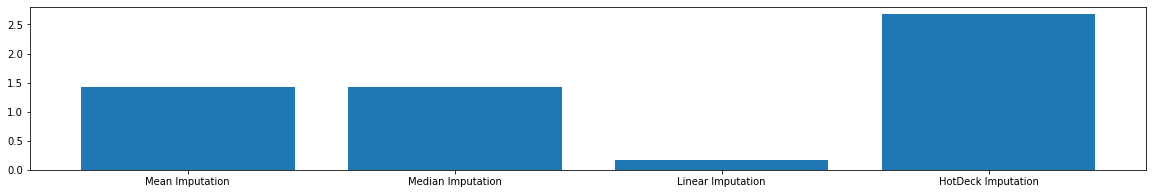

In [34]:
plt.figure(figsize=(20, 3))
plt.bar(*zip(*listErrors.items()))
plt.show()